In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Random Forest Model

In [22]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True,header=1)

# Note the warning about dtypes.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [5]:
y2015['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)', nan],
      dtype=object)

In [23]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [24]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [11]:
#pd.get_dummies(y2015)

In [12]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

#cross_val_score(rfc, X, Y, cv=10)
cross_val_score(rfc, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

array([0.97424633, 0.96412966, 0.71117312, 0.81349593, 0.9773796 ])

In [25]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
grade
7
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
purpose
14
title
27
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [26]:
numerical = y2015.select_dtypes(exclude=['object'])
for i in numerical:
    column = numerical[i]
    print(i)
    print(column.nunique())

id
421095
member_id
421095
loan_amnt
1361
funded_amnt
1361
funded_amnt_inv
1366
int_rate
110
installment
40495
annual_inc
26903
dti
4086
delinq_2yrs
26
inq_last_6mths
7
mths_since_last_delinq
140
mths_since_last_record
121
open_acc
73
pub_rec
28
revol_bal
62072
total_acc
126
out_prncp
120654
out_prncp_inv
130630
total_pymnt
275495
total_pymnt_inv
279430
total_rec_prncp
136974
total_rec_int
219016
total_rec_late_fee
2500
recoveries
10436
collection_recovery_fee
10560
last_pymnt_amnt
123886
collections_12_mths_ex_med
10
mths_since_last_major_derog
162
policy_code
1
annual_inc_joint
308
dti_joint
449
acc_now_delinq
8
tot_coll_amt
8350
tot_cur_bal
230329
open_acc_6m
13
open_il_6m
35
open_il_12m
12
open_il_24m
17
mths_since_rcnt_il
201
total_bal_il
17030
il_util
160
open_rv_12m
18
open_rv_24m
28
max_bal_bc
10707
all_util
139
total_rev_hi_lim
10694
inq_fi
18
total_cu_tl
33
inq_last_12m
28
acc_open_past_24mths
47
avg_cur_bal
56003
bc_open_to_buy
51127
bc_util
1320
chargeoff_within_12_mths
10


In [30]:
%%timeit
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Can you do it without using anything related to payment amount or outstanding principal? 
# Remove all columns related to payment amount and outstanding principal 
columns = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int','last_pymnt_amnt']

X_trim = X.drop(columns=columns)

# Rerun model with reduced data set
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_trim, Y, cv=10)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

KeyboardInterrupt: 

# Decision Tree

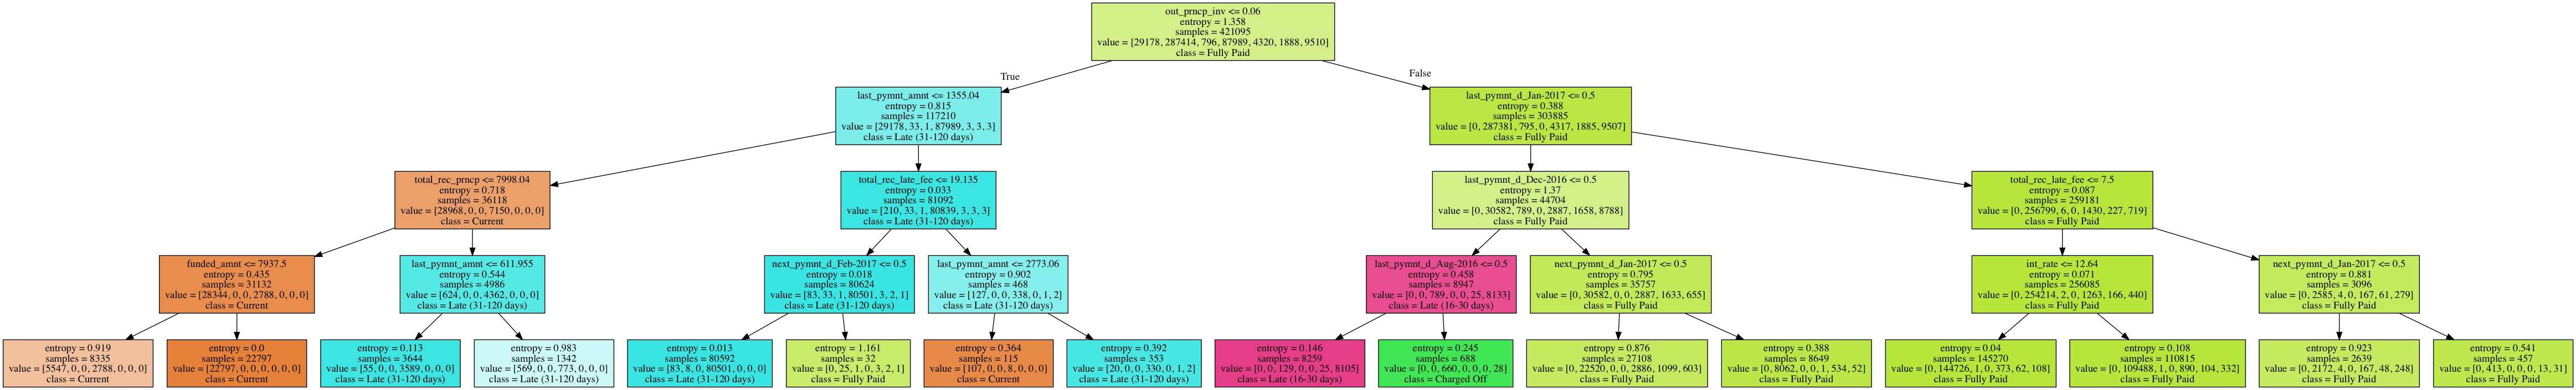

In [18]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
#    max_features=1,
    max_depth=4,
#    random_state = 1337
)

X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

#decision_tree.fit(customers, repeat_customer)
decision_tree.fit(X,Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree, X, Y, cv=10)

array([0.97387856, 0.97409228, 0.97508964, 0.97482843, 0.97402042,
       0.97333175, 0.97340236, 0.97164502, 0.97173867, 0.96995678])